# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

In [152]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Finding Total and Average Score of all students.

In [153]:
df['total'] = df['math'] + df['reading'] + df['writing']
df['average_score'] = df['total'] / 3
df['average_score'] = df['average_score'].round(2)
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [154]:
df.describe()

,math,reading,writing,total,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770580
std,15.16308,14.600192,15.195657,42.771978,14.257311
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.330000
50%,66.00000,70.000000,69.000000,205.000000,68.330000
75%,77.00000,79.000000,79.000000,233.000000,77.670000
max,100.00000,100.000000,100.000000,300.000000,100.000000


The average of all three exam is between 65-70.

## Q1. What are the average reading scores for students with/without the test preparation course?

In [155]:
q1 = df.groupby('test_prep_course')['reading'].mean()
q1 = q1.round(2)
q1.head()

test_prep_course
completed    73.89
none         66.53
Name: reading, dtype: float64

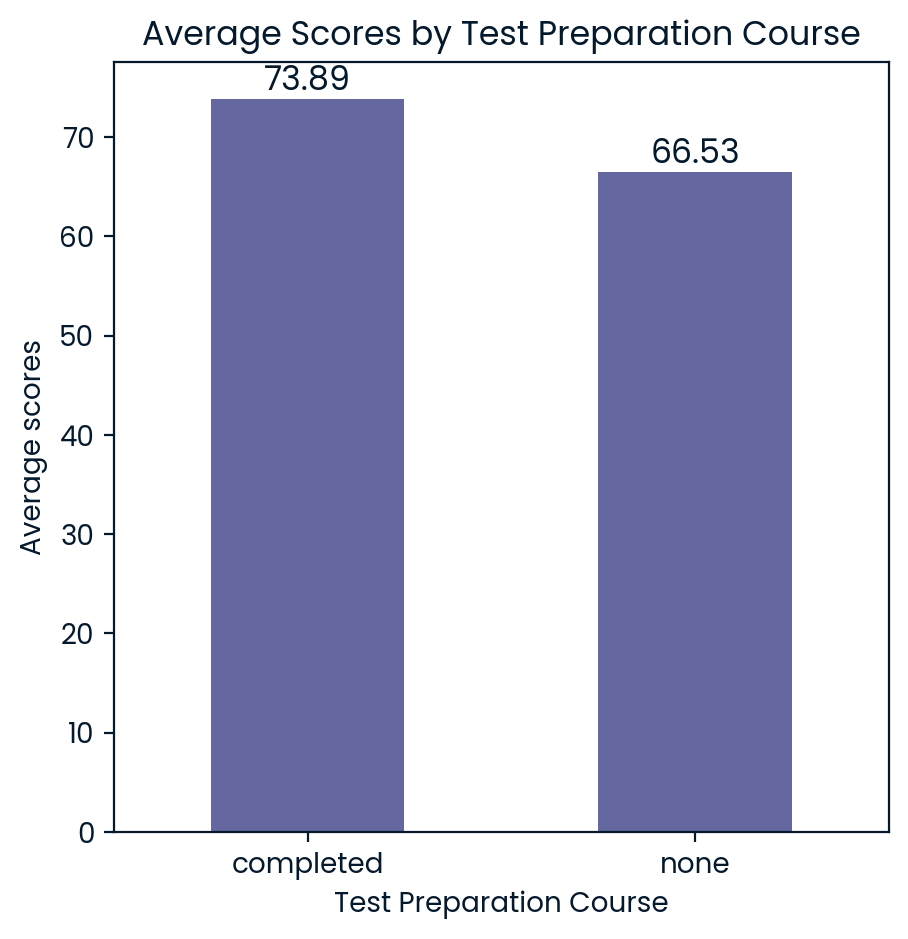

In [156]:
plt.figure(figsize=(5,5))
ax = q1.plot(kind='bar')

plt.xlabel("Test Preparation Course")
plt.ylabel("Average scores")
plt.title("Average Scores by Test Preparation Course")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)
plt.show()

Students who completed test course has score more than the who didn't completed.

## Q2. What are the average scores for the different parental education levels?

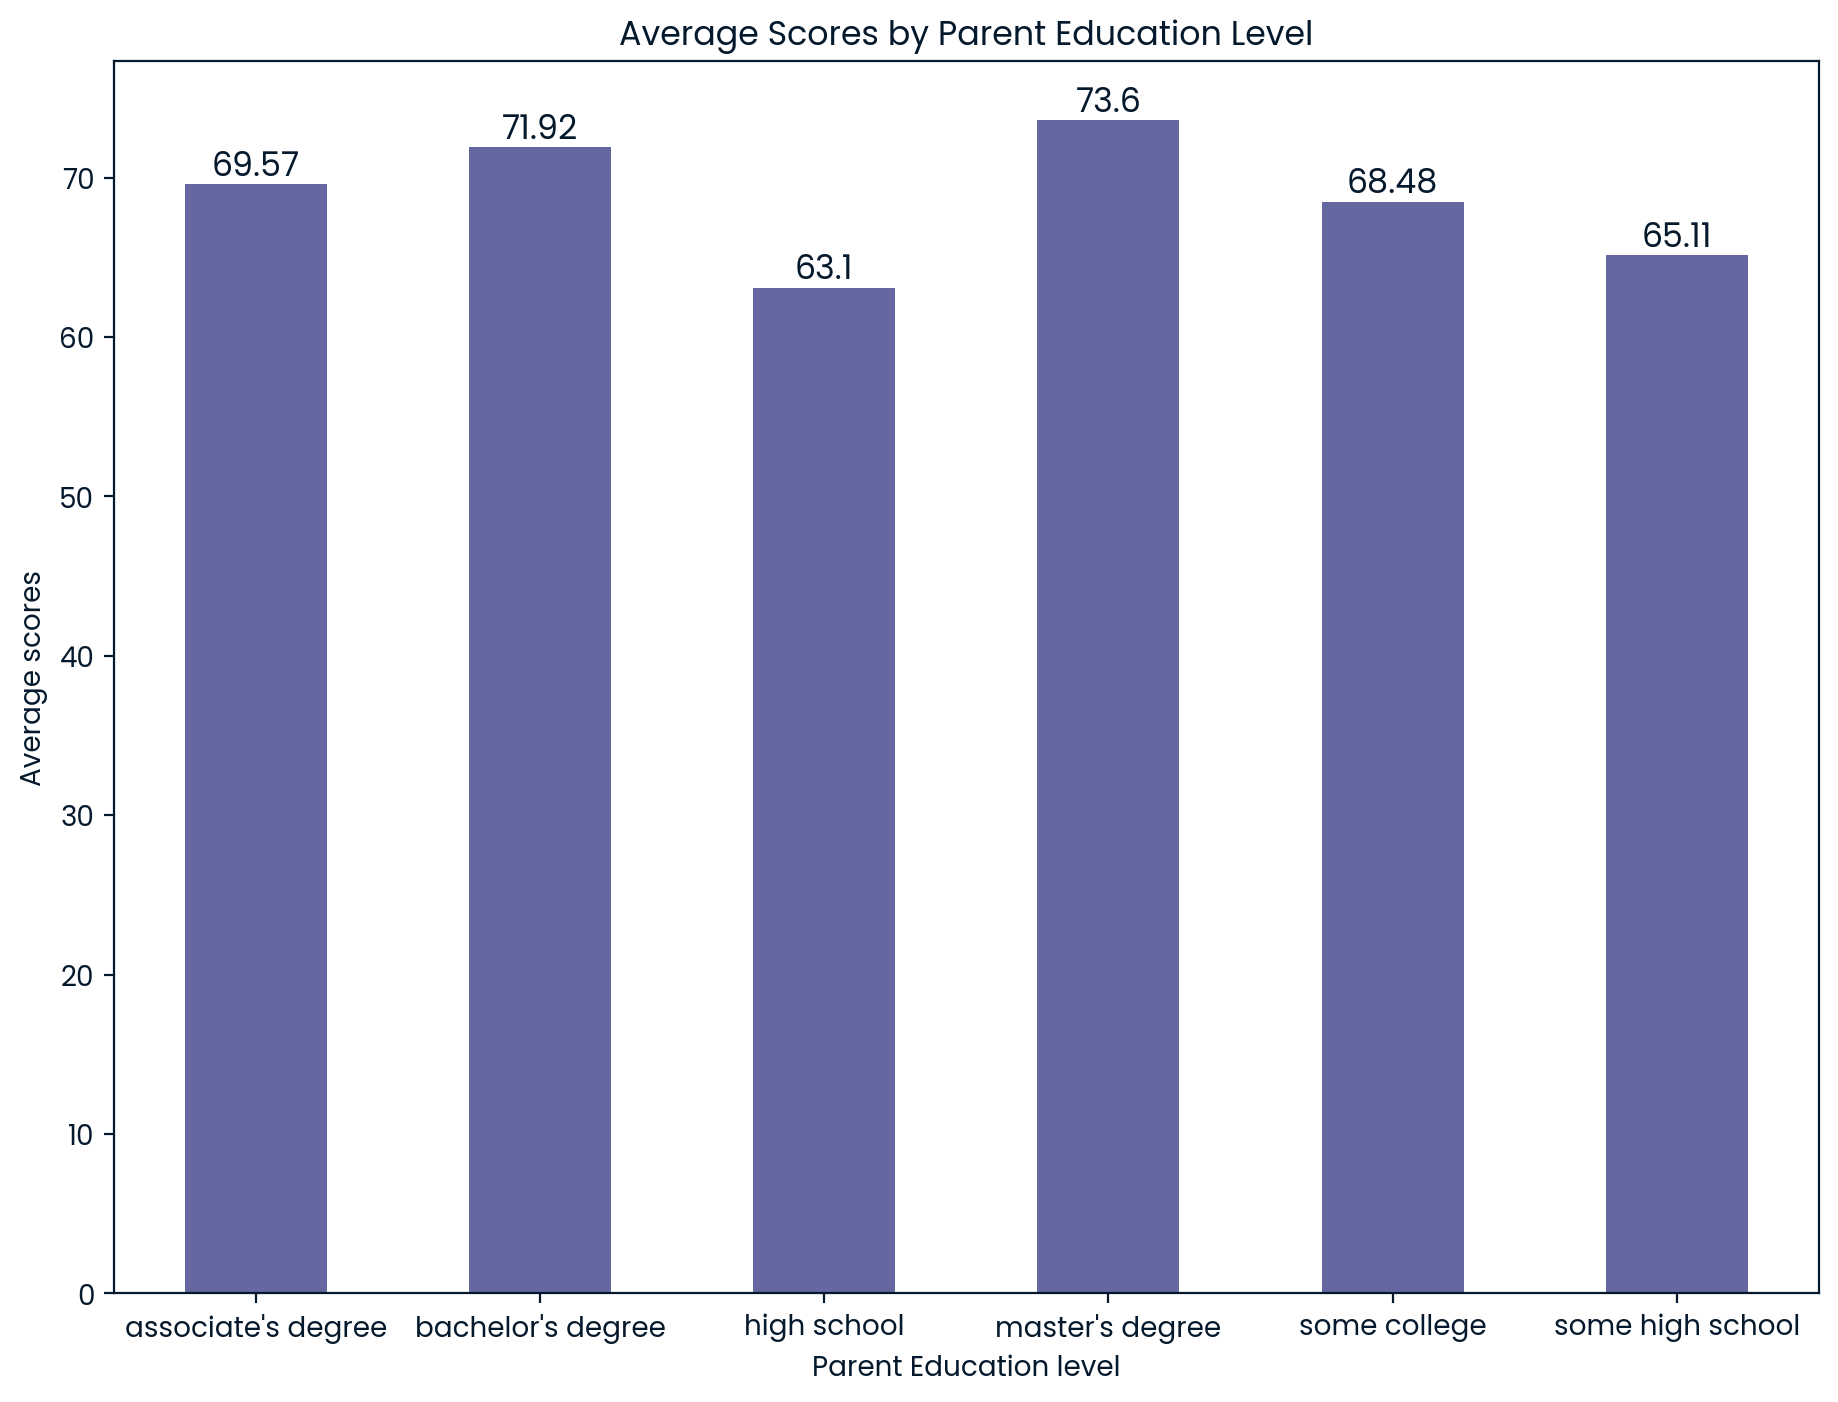

In [157]:
q2 = df.groupby('parent_education_level')['average_score'].mean()
q2 = q2.round(2)

plt.figure(figsize=(11,8))
ax = q2.plot(kind='bar')

plt.xlabel("Parent Education level")
plt.ylabel("Average scores")
plt.title("Average Scores by Parent Education Level")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)
plt.show()

Parents with master degree's children has scored more than the other education level and parents with only high school education has least.

Parents with master degree's children has scored more in 'reading', 'writing', 'math' individually than anyother education level.

## Q3. Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [158]:
q3 = df.pivot_table(columns='parent_education_level',index='test_prep_course',values='average_score',aggfunc='mean')
q3 = q3.round(2)
q3

parent_education_level,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
test_prep_course,,,,,,
completed,74.94,76.24,66.96,76.32,74.65,69.34
none,66.42,69.17,61.55,72.20,65.28,61.91


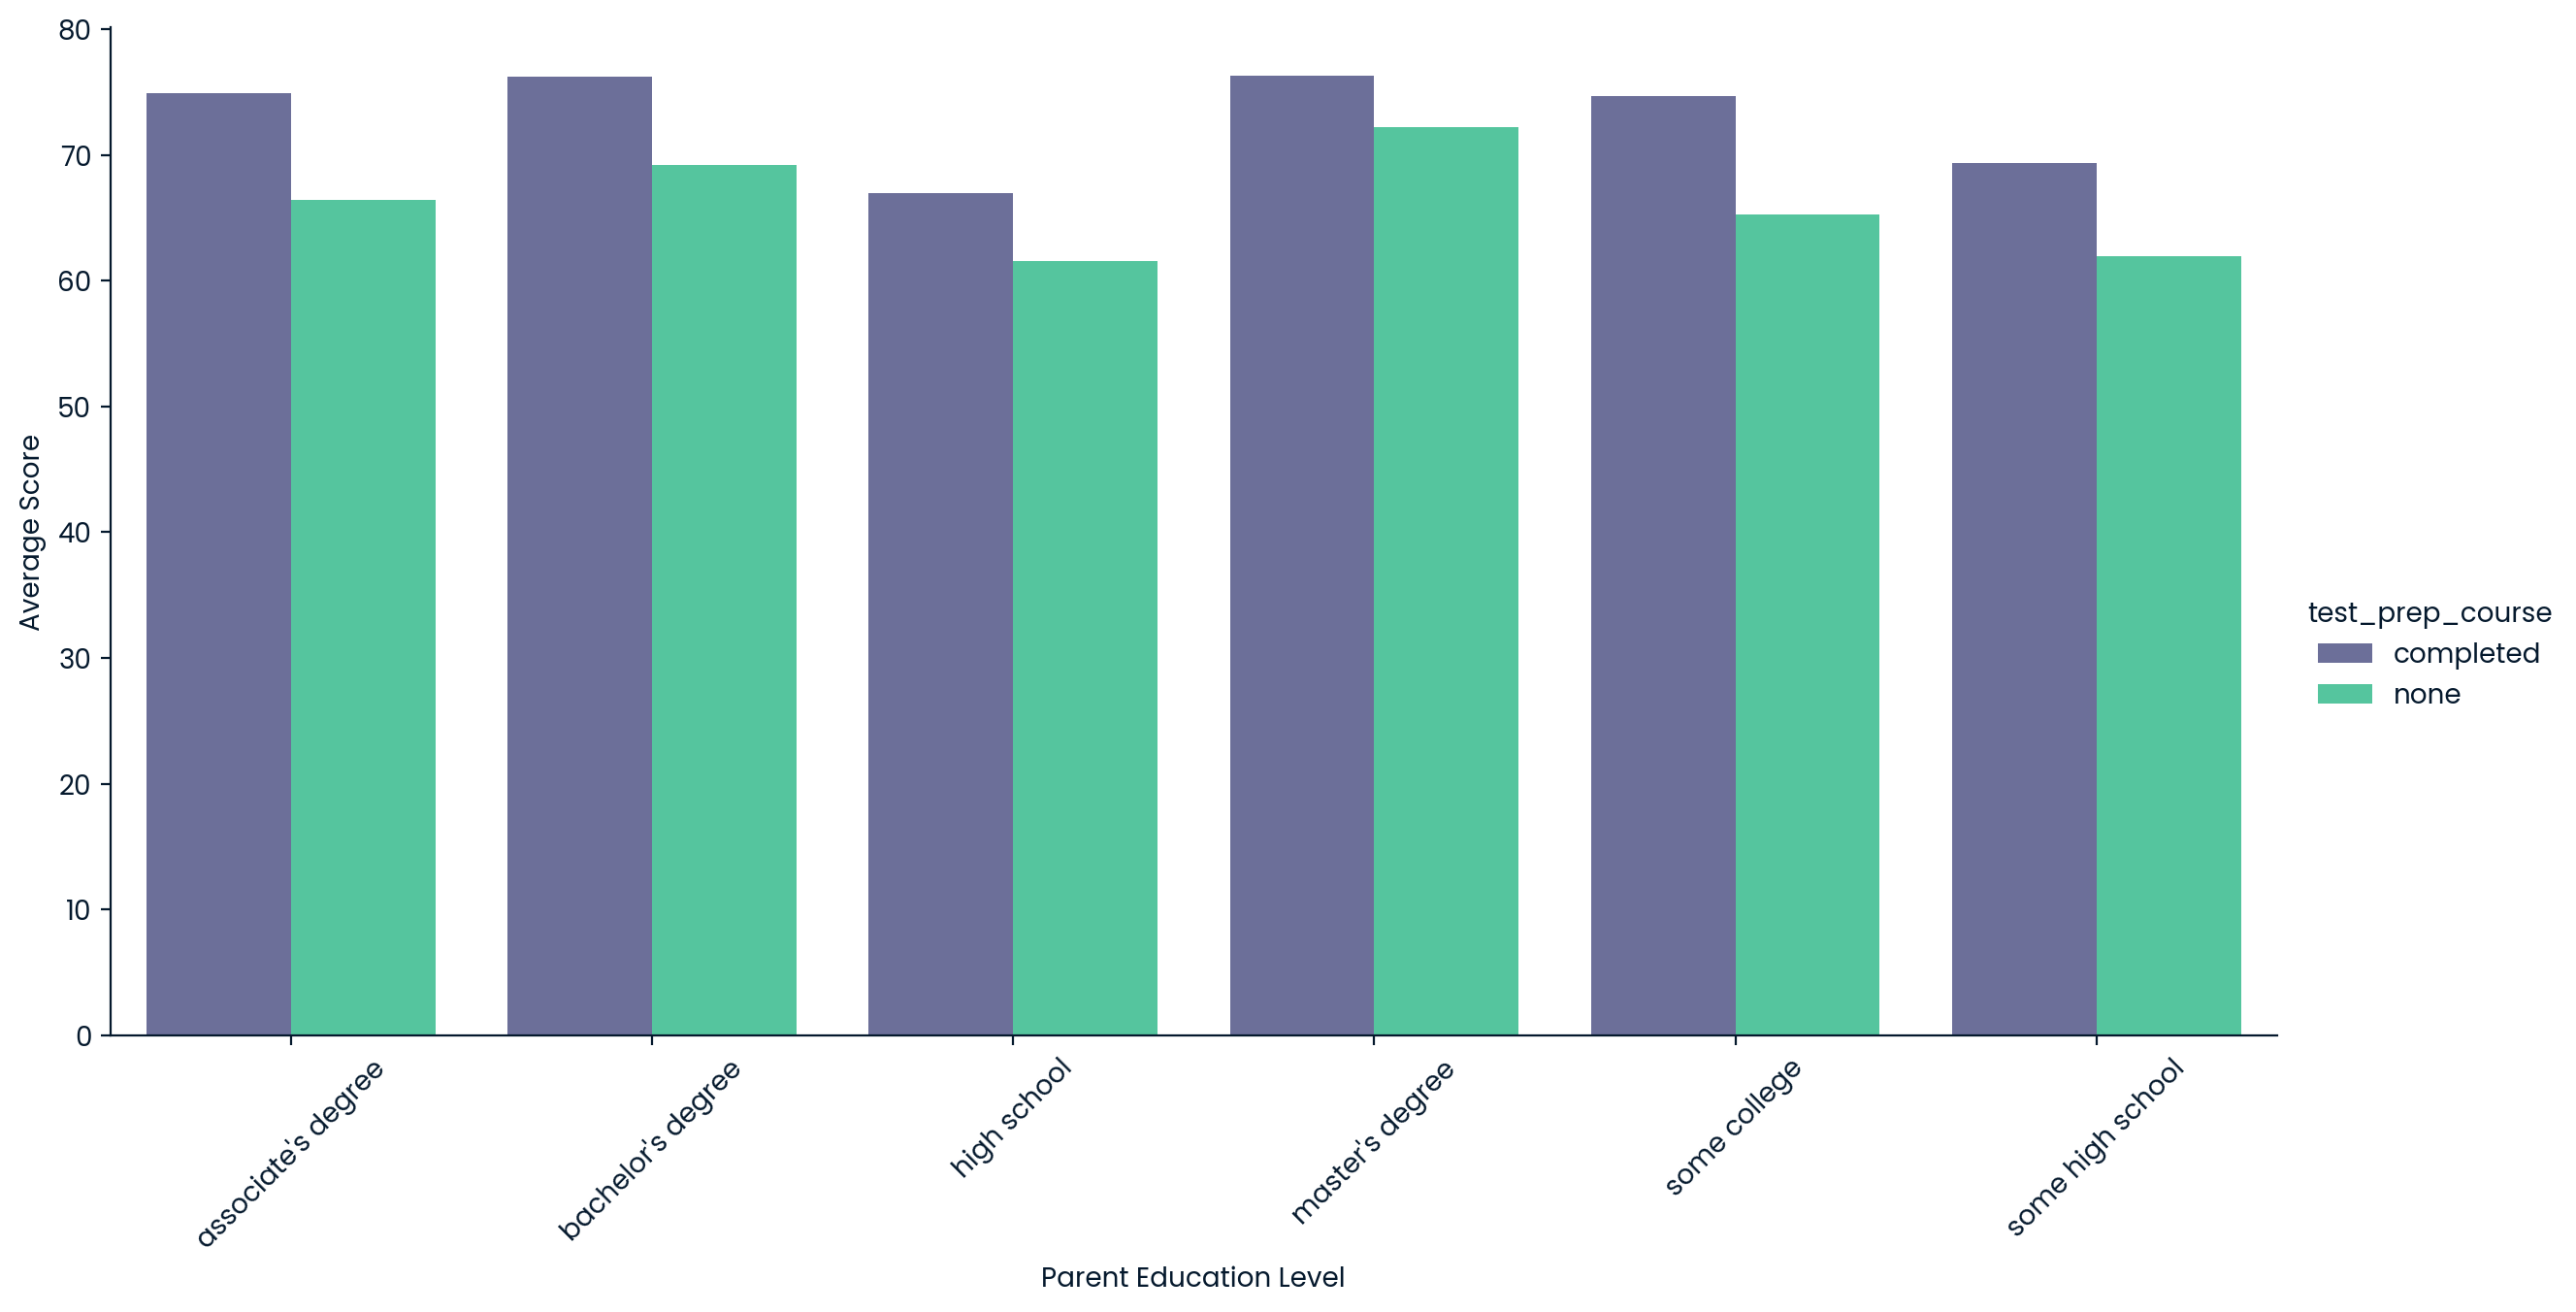

In [159]:
# Melt the pivot table for easier plotting
q3_melted = q3.reset_index().melt(id_vars='test_prep_course', var_name='parent_education_level', value_name='average_score')

# Create faceted bar plots
g = sns.catplot(data=q3_melted, x='parent_education_level', y='average_score', hue='test_prep_course', kind='bar', height=6, aspect=2)
g.set_axis_labels("Parent Education Level", "Average Score")
g.set_titles("Average Scores by Test Prep Course and Parent Education Level")
plt.xticks(rotation=45)
plt.show()

## Q4. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

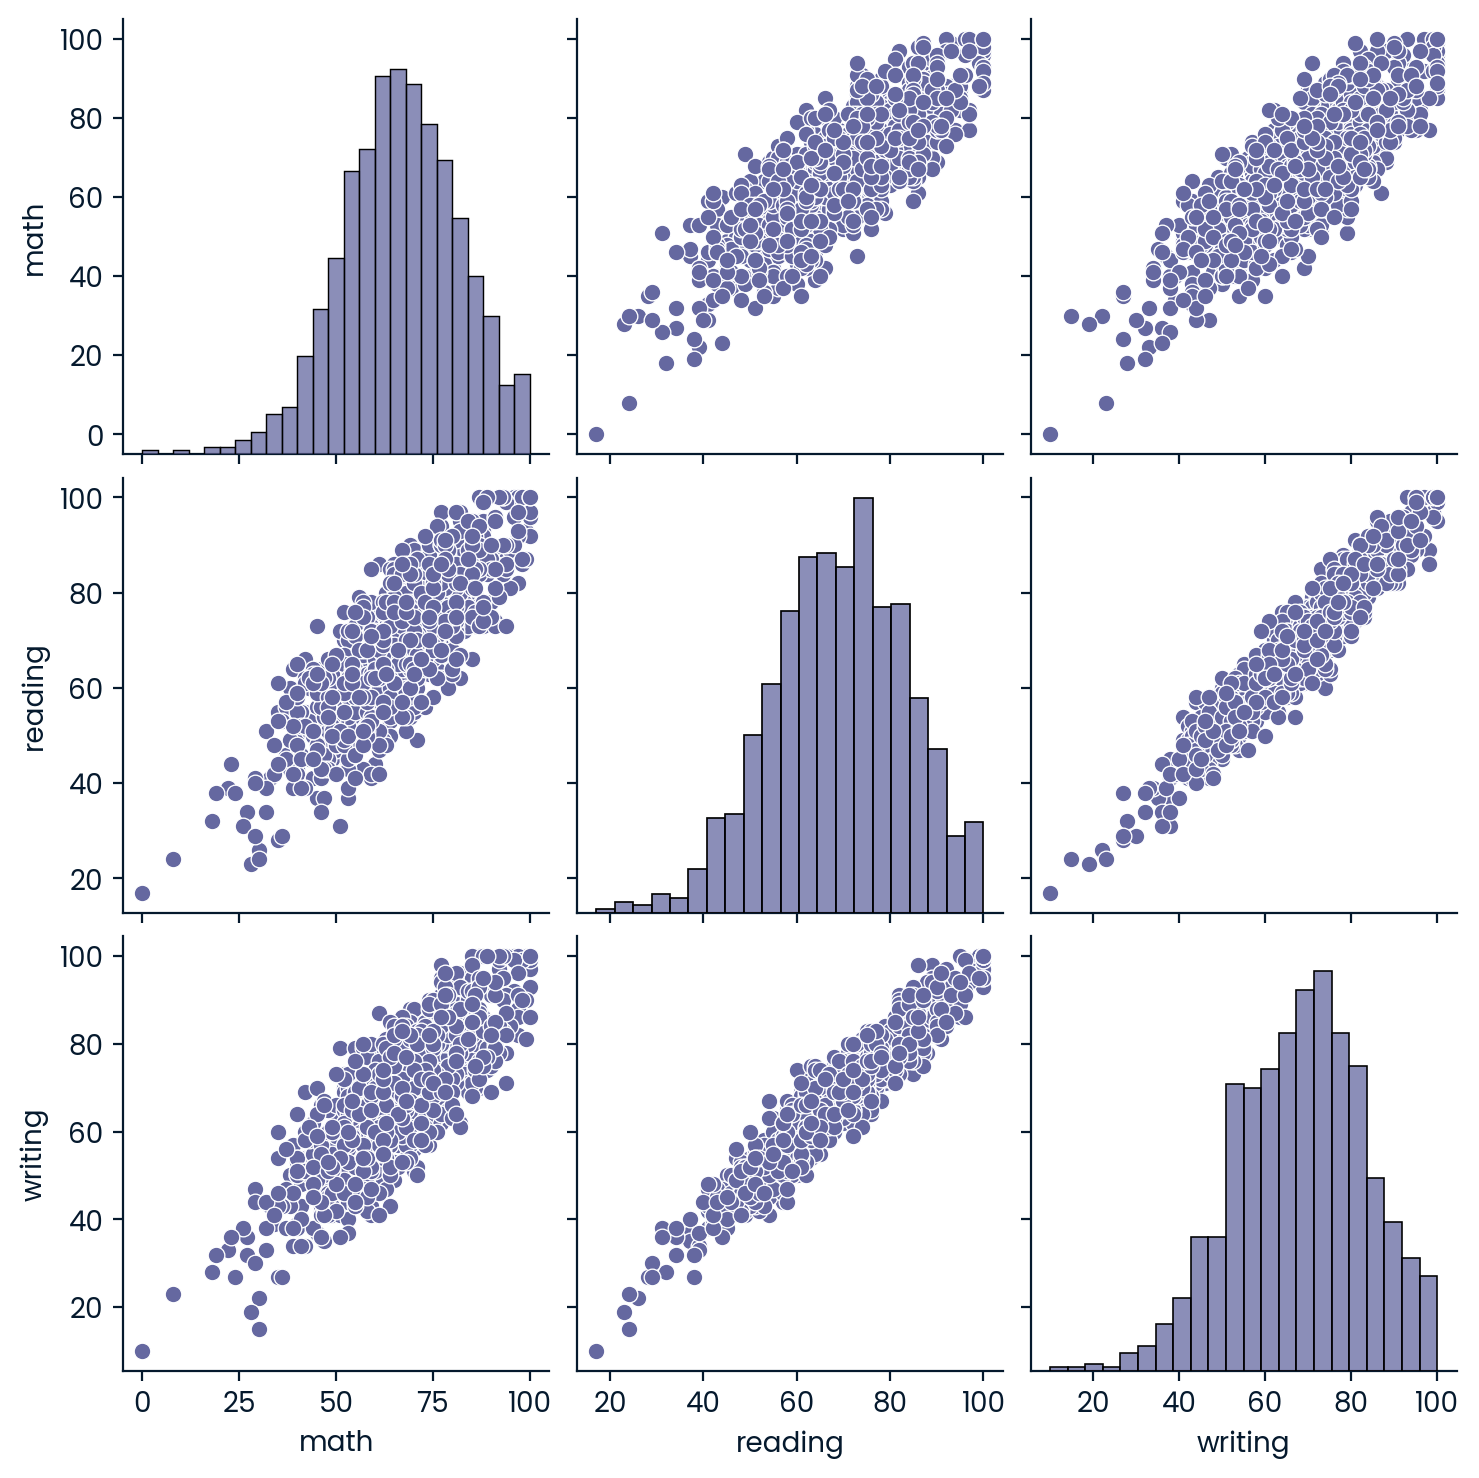

In [160]:
q4 = df[['math','reading','writing']]
sns.pairplot(q4)

There is strong positive corelation among all three 'reading', 'math' and 'writing'.

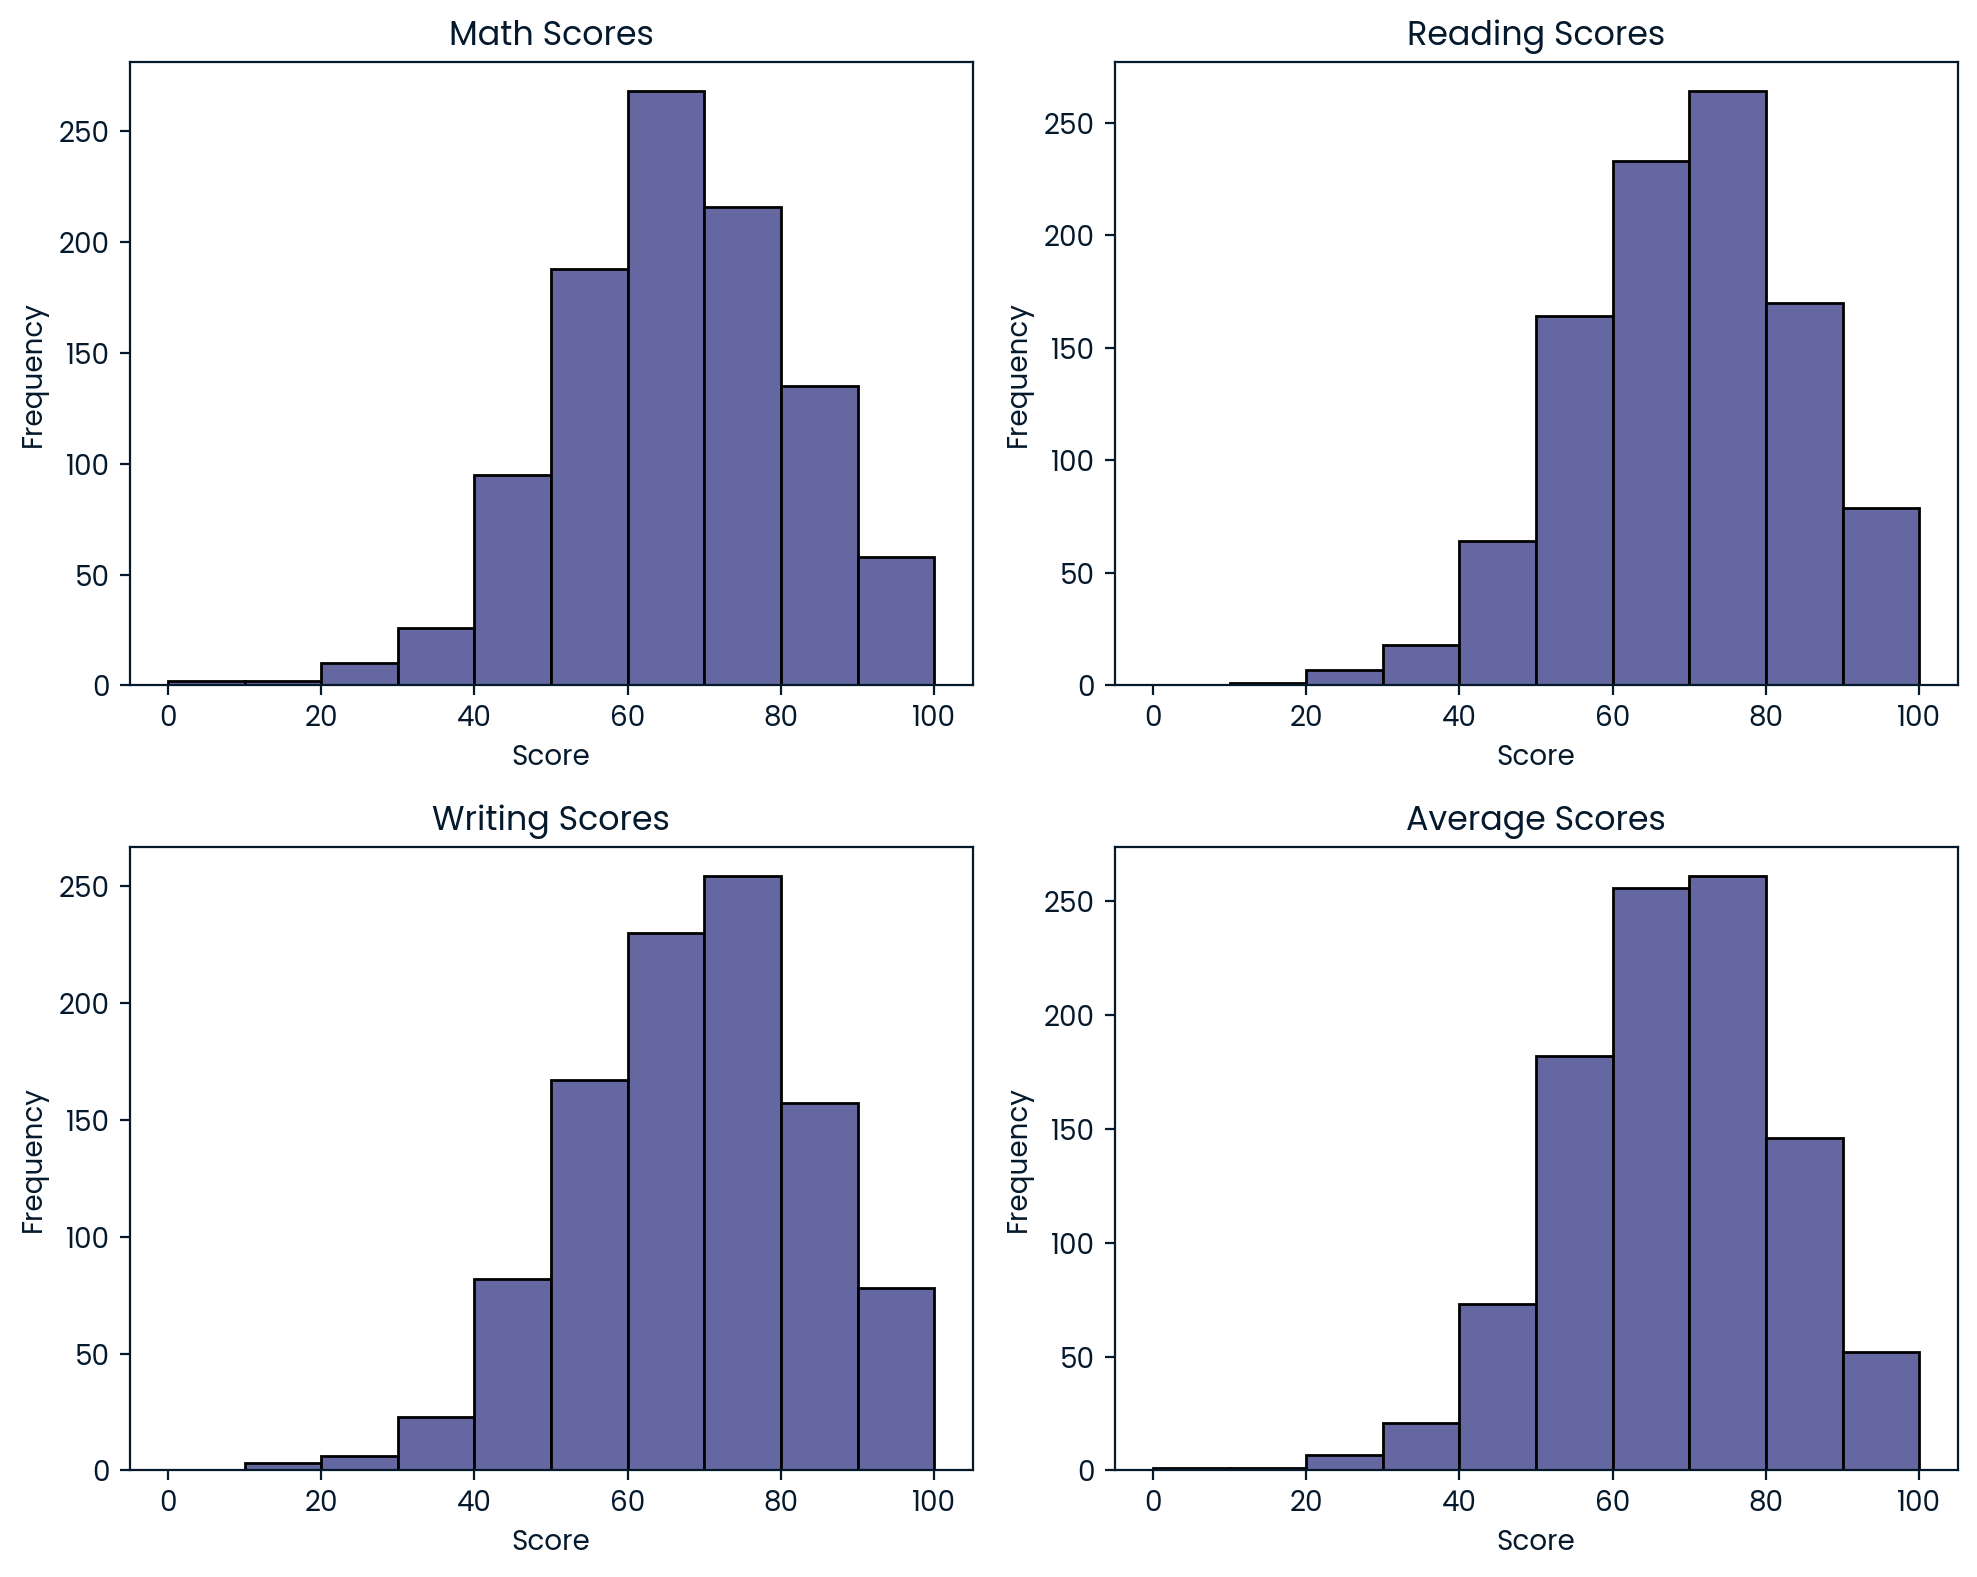

In [161]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(df['math'], bins=10, range=(0, 100), edgecolor='black')
axs[0, 0].set_title('Math Scores')
axs[0, 0].set_xlabel('Score')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['reading'], bins=10, range=(0, 100), edgecolor='black')
axs[0, 1].set_title('Reading Scores')
axs[0, 1].set_xlabel('Score')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['writing'], bins=10, range=(0, 100), edgecolor='black')
axs[1, 0].set_title('Writing Scores')
axs[1, 0].set_xlabel('Score')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['average_score'], bins=10, range=(0, 100), edgecolor='black')
axs[1, 1].set_title('Average Scores')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In Math , 60-70 is average score whereas in Reading and Writing is 70-80.

## Q5. What is average score for 'race/ethnicity' and 'parent_education_level'?

In [162]:
q5=df.pivot_table(columns="race/ethnicity", index='parent_education_level',values='average_score')
q5=q5.round(2)
q5

race/ethnicity,group A,group B,group C,group D,group E
parent_education_level,,,,,
associate's degree,63.88,67.98,69.38,69.33,73.97
bachelor's degree,67.86,71.30,73.24,69.87,75.59
high school,61.28,61.50,62.33,63.48,69.55
master's degree,63.33,74.83,69.03,76.48,79.08
some college,64.89,64.38,67.81,70.44,72.22
some high school,59.86,64.29,63.16,68.61,69.41


Race/Ethnicity - Group E students score the highest average score in any parental education level and Group A students were lowest in all(except one).

Parent with master degree and who belongs to Group E children on average score highest in all three(reading, math, writing).



## Q6. What is average score for student who has taken Test Preparation course?

In [163]:
q6 = df.groupby('test_prep_course')['average_score'].mean()
q6 = q6.round(2)
q6

test_prep_course
completed    72.67
none         65.04
Name: average_score, dtype: float64

Student who completed the Test Prep course has scored highest on average as well as individually on all three(reading, math, writing).

## Q7. What is average score for student by gender?

In [164]:
q7 = df.groupby('gender')['average_score'].mean()
q7 = q7.round(2)
q7

gender
female    69.57
male      65.84
Name: average_score, dtype: float64

In [165]:
q7 = df.groupby('gender')['math'].mean()
q7 = q7.round(2)
q7

gender
female    63.63
male      68.73
Name: math, dtype: float64

Female Student has scored highest on average as well as individually in reading and writing than male students whereas Male student has scored more in math.

## Q8. What is average score for student who take lunch?

In [166]:
q8 = df.groupby('lunch')['average_score'].mean()
q8 = q8.round(2)
q8

lunch
free/reduced    62.20
standard        70.84
Name: average_score, dtype: float64

Student who have standard lunch has scored highest on average as well as individually on all three(reading, math, writing).

## Q9. Top 10 students

In [167]:
df.sort_values(by='total',ascending=False).head(10)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,total,average_score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67
179,female,group D,some high school,standard,completed,97,100,100,297,99.00
712,female,group D,some college,standard,none,98,100,99,297,99.00
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.67
625,male,group D,some college,standard,completed,100,97,99,296,98.67
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.67
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.67


Interestingly all three student with 100's in all three exam, thier parent does not have master degree and two of them didn't take Test Preparation course.

## Q10. Number of students with 100 score individually and atleast one.

In [168]:
hundred_score_reading = len(df[df['reading'] == 100])
hundred_score_math = len(df[df['math'] == 100])
hundred_score_writing = len(df[df['writing'] == 100])
hundred_score_one = len(df[(df['writing'] == 100) | (df['reading'] == 100) | (df['math'] == 100)])

print("Number of students who scored 100 in reading are: {0} ".format(hundred_score_reading))
print("Number of students who scored 100 in math are: {0} ".format(hundred_score_math))
print("Number of students who scored 100 in writing are: {0} ".format(hundred_score_writing))
print("Number of students who scored 100 in atelast one are: {0} ".format(hundred_score_one))

Number of students who scored 100 in reading are: 17 
Number of students who scored 100 in math are: 7 
Number of students who scored 100 in writing are: 14 
Number of students who scored 100 in atelast one are: 23 


# Conclusion

Race/Ethnicity - Group E students score the highest on average score.

Parental education level with master degree children has scored more on average.

Students who completed Test course has scored more on average than who didn't.

Female students has scored more on average than the male.

Student who has taken lunch has scored more than who didn't.